Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Kamiel Kunst"
STUDENT_NUMBER = "s1037679"
COLLABORATOR_NAME = "Maris Galesloot"
COLLABORATOR_STUDENT_NUMBER = "s4634098"

---

# Assignment 4

## Objective of this assignment
The objective of this exercise is to understand how the unsupervised learning methods $k$-means clustering and hierarchical clustering work. Upon completing the exercise you should also understand how the choice of number of clusters, distance metrics and linkage functions can impact the solutions obtained and further be able to interpret dendrograms and measures of cluster validity

## **Important:** When handing in your homework:
+ Hand in the notebook (and nothing else) named as follows: StudentName1_snumber_StudentName2_snumber.ipynb
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Blackboard.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ For problems or questions: use the BB discussion board or email the student assistants.


## Advised Reading and Exercise Material
**The following reading material is recommended:**

- Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, *Introduction to Data Mining*, section 8.1-8.3 and 8.5.7


## Additional Tools
For this exercise you will need to load the provided *clusterPlot.py* and *clusterVal.py* scripts from the toolbox folder. 


## Introduction
In previous exercises we considered supervised learning, i.e., we were given both input data **X** and output values **Y**. We now move on to unsupervised learning where we are only provided input data **X**. The aim is here to find common patterns in the data such as groups of observations that are similar in some sense. In this exercise we will consider two clustering approaches for unsupervised learning: *k*-means clustering and hierarchical clustering.


## 4.1 *k*-means clustering
In this part of the exercise we will investigate *k*-means clustering. In *k*-means each of the data points are assigned to the cluster in closest proximity according to some measure of distance between cluster centers and data points. When the distance is given by the squared euclidian distance, the centers are also called centroids. Once the data points have been assigned, each cluster center is updated to be placed at the center of the data points that are assigned to the cluster. This continues iteratively, usually until the assignment of data points to centers no longer changes or until a maximal number of iterations is reached.

> 4.1.1a (1 point) Load the `synth1` data into python using the `loadmat` function. Cluster the data into `K = 4` clusters using the *k*-means algorithm. Make a scatter plot of the data and the clustering using the provided `clusterPlot()` function.
 + *In Python, you can use the function `KMeans()` from the package sklearn.cluster to compute *k*-means clustering. please read the documentation of the function, as it creates an object which you can then use for clustering.*
 + *Type `clusterPlot(X,clusters,centroids,y)` to plot the data and the clustering. Don't forget to import the function from the `toolbox` folder. If you are unsure about how to use the function, open the .py file in a text editor and take a look at documentation.*

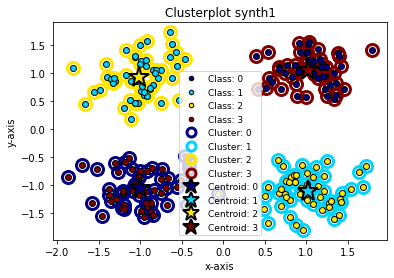

In [2]:
from sklearn.cluster import KMeans
import scipy
from scipy import io
import matplotlib.pyplot as plt
from toolbox.clusterPlot import clusterPlot
import numpy as np

data1 = scipy.io.loadmat("./data/synth1.mat")
X1 = data1["X"]
y1 = data1["y"]
kmeans1 = KMeans(n_clusters=4).fit(X1)
clusters = kmeans1.predict(X1)
clusterPlot(X1, clusters, kmeans1.cluster_centers_, y=y1)
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Clusterplot synth1")
plt.show()

> 4.1.1b (1 point) Cluster and plot the data sets *synth2*, *synth3*, and *synth4* with the same number of *K*. Does the clustering coincide with the true classes? Explain for every data set. 

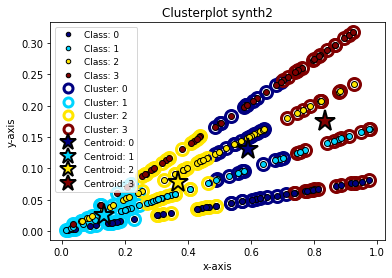

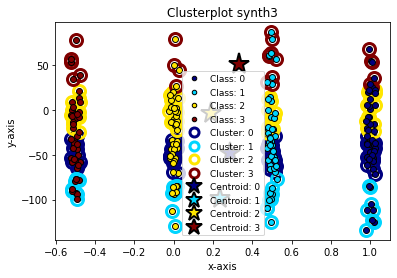

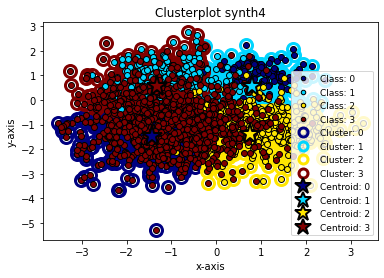

In [3]:
data2 = scipy.io.loadmat("./data/synth2.mat")
X2 = data2["X"]
y2 = data2["y"]
kmeans2 = KMeans(n_clusters=4).fit(X2)
clusters = kmeans2.predict(X2)
clusterPlot(X2, clusters, kmeans2.cluster_centers_, y=y2)
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Clusterplot synth2")
plt.show()

data3 = scipy.io.loadmat("./data/synth3.mat")
X3 = data3["X"]
y3 = data3["y"]
kmeans3 = KMeans(n_clusters=4).fit(X3)
clusters= kmeans3.predict(X3)
clusterPlot(X3, clusters, kmeans3.cluster_centers_, y= y3)
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Clusterplot synth3")
plt.show()

data4 = scipy.io.loadmat("./data/synth4.mat")
X4 = data4["X"]
y4 = data4["y"]
kmeans4 = KMeans(n_clusters=4).fit(X4)
clusters= kmeans4.predict(X4)
clusterPlot(X4, clusters, kmeans4.cluster_centers_, y=y4)
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Clusterplot synth4")
plt.show()

For the second and third dataset the clustering does not coincide with the true classes. It is clearly visible in  both plots that there are 4 seperate lines, I would assume these lines are the different classes, However the predicted clusters are shown in the wrong way. For the fourth dataset, the data is all over the place so, it is harder to determine the classes and clusters. In the end, no clusters precisely coincide with the classes as seen in exercise 4.1.1a

Rather than using the error rate we will consider the supervised measures of cluster validity described in *Introduction to Data Mining* section 8.5.7, in particular the entropy, purity, rand statistic, and Jaccard coefficient. Carefully review these measures in the book and make sure you understand how they are calculated.

> 4.1.2a (1 point) Perform *k*-means clustering for *K = 1, ..., 10* clusters on each of the datasets. For each value of *K* compute the four cluster validity measures mentioned above. For each dataset: plot the calculated cluster validity measures as a function of *K*. Add a legend to each figure in order to indicate which measures are plotted in which colour.
 + *Use the clusterVal() function to compute the cluster validity. Don't forget to import it from the `toolbox folder`. If you are unsure about how to use the function, open the .py file in a text editor and take a look at documentation.*

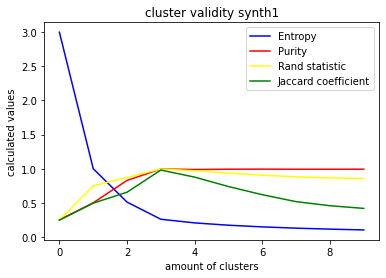

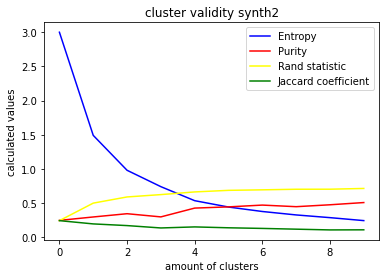

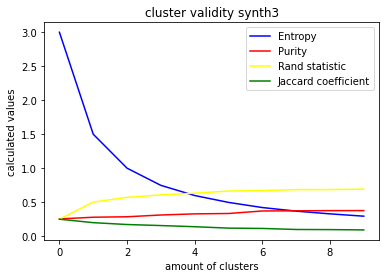

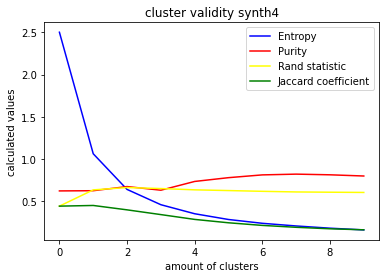

In [4]:
from toolbox.clusterVal import clusterVal

ent = []
pur = []
ran = []
jac = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i).fit(X1)
    cluster_id = kmeans.labels_
    entropy, purity, rand, jaccard = clusterVal(y1, cluster_id)
    ent.append(entropy)
    pur.append(purity)
    ran.append(rand)
    jac.append(jaccard)
    
plt.plot(ent, color = 'blue', label = 'Entropy')
plt.plot(pur, color = 'red', label = 'Purity')
plt.plot(ran, color = 'yellow', label = 'Rand statistic')
plt.plot(jac, color = 'green', label = 'Jaccard coefficient')
plt.legend()
plt.xlabel("amount of clusters")
plt.ylabel("calculated values")
plt.title("cluster validity synth1")
plt.show()


ent = []
pur = []
ran = []
jac = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i).fit(X2)
    cluster_id = kmeans.labels_
    entropy, purity, rand, jaccard = clusterVal(y2, cluster_id)
    ent.append(entropy)
    pur.append(purity)
    ran.append(rand)
    jac.append(jaccard)
    
plt.plot(ent, color = 'blue', label = 'Entropy')
plt.plot(pur, color = 'red', label = 'Purity')
plt.plot(ran, color = 'yellow', label = 'Rand statistic')
plt.plot(jac, color = 'green', label = 'Jaccard coefficient')
plt.legend()
plt.xlabel("amount of clusters")
plt.ylabel("calculated values")
plt.title("cluster validity synth2")
plt.show()


ent = []
pur = []
ran = []
jac = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i).fit(X3)
    cluster_id = kmeans.labels_
    entropy, purity, rand, jaccard = clusterVal(y3, cluster_id)
    ent.append(entropy)
    pur.append(purity)
    ran.append(rand)
    jac.append(jaccard)
    
plt.plot(ent, color = 'blue', label = 'Entropy')
plt.plot(pur, color = 'red', label = 'Purity')
plt.plot(ran, color = 'yellow', label = 'Rand statistic')
plt.plot(jac, color = 'green', label = 'Jaccard coefficient')
plt.legend()
plt.xlabel("amount of clusters")
plt.ylabel("calculated values")
plt.title("cluster validity synth3")
plt.show()



ent = []
pur = []
ran = []
jac = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i).fit(X4)
    cluster_id = kmeans.labels_
    entropy, purity, rand, jaccard = clusterVal(y4, cluster_id)
    ent.append(entropy)
    pur.append(purity)
    ran.append(rand)
    jac.append(jaccard)
    
plt.plot(ent, color = 'blue', label = 'Entropy')
plt.plot(pur, color = 'red', label = 'Purity')
plt.plot(ran, color = 'yellow', label = 'Rand statistic')
plt.plot(jac, color = 'green', label = 'Jaccard coefficient')
plt.legend()
plt.xlabel("amount of clusters")
plt.ylabel("calculated values")
plt.title("cluster validity synth4")
plt.show()

> 4.1.2b (1 point) How can the cluster validity measures be used to select the best number of clusters?
What happens when more than four clusters are used to model the data?

For the data in synth1 it is clear that 4 clusters gives the best result. In the corresponding graph, it is visible that the jaccard coefficient has the highest value for 4 clusters. When you use more than 4 clusters the jaccard coefficient goes significantly down, but the others values only change a little. So, the jaccard coefficient should be high, as well as the purity and the rand statistic. However the entropy should be lower.

*k*-means clustering has many different applications, one of which is data compression. A data set can be compressed by performing *k*-means clustering and then representing each data object by the centroid of the corresponding cluster. Thus, the only data that need to be stored are the *K* cluster centers and the *N* cluster indices.

> 4.1.3a (1 point) We will consider a subset of the wild faces data described in berg2005[1]. Load the wildfaces data, `data/wildfaces.mat` using the `loadmat` function. Each data object is a $40 \times 40 \times 3 = 4800$ dimensional vector, corresponding to a 3-color $40 \times 40$ pixels image. Compute a *k*-means clustering of the data with *K = 10* clusters. Plot a few random images from the data set as well as their corresponding cluster centroids to see how they are represented.
+ You can plot an image by the command `imshow(np.reshape(X[k,:],(c,x,y)).T)` which reshapes an image vector to a 3-dimensional array and plots it. You can plot the cluster centroids in a similar manner.


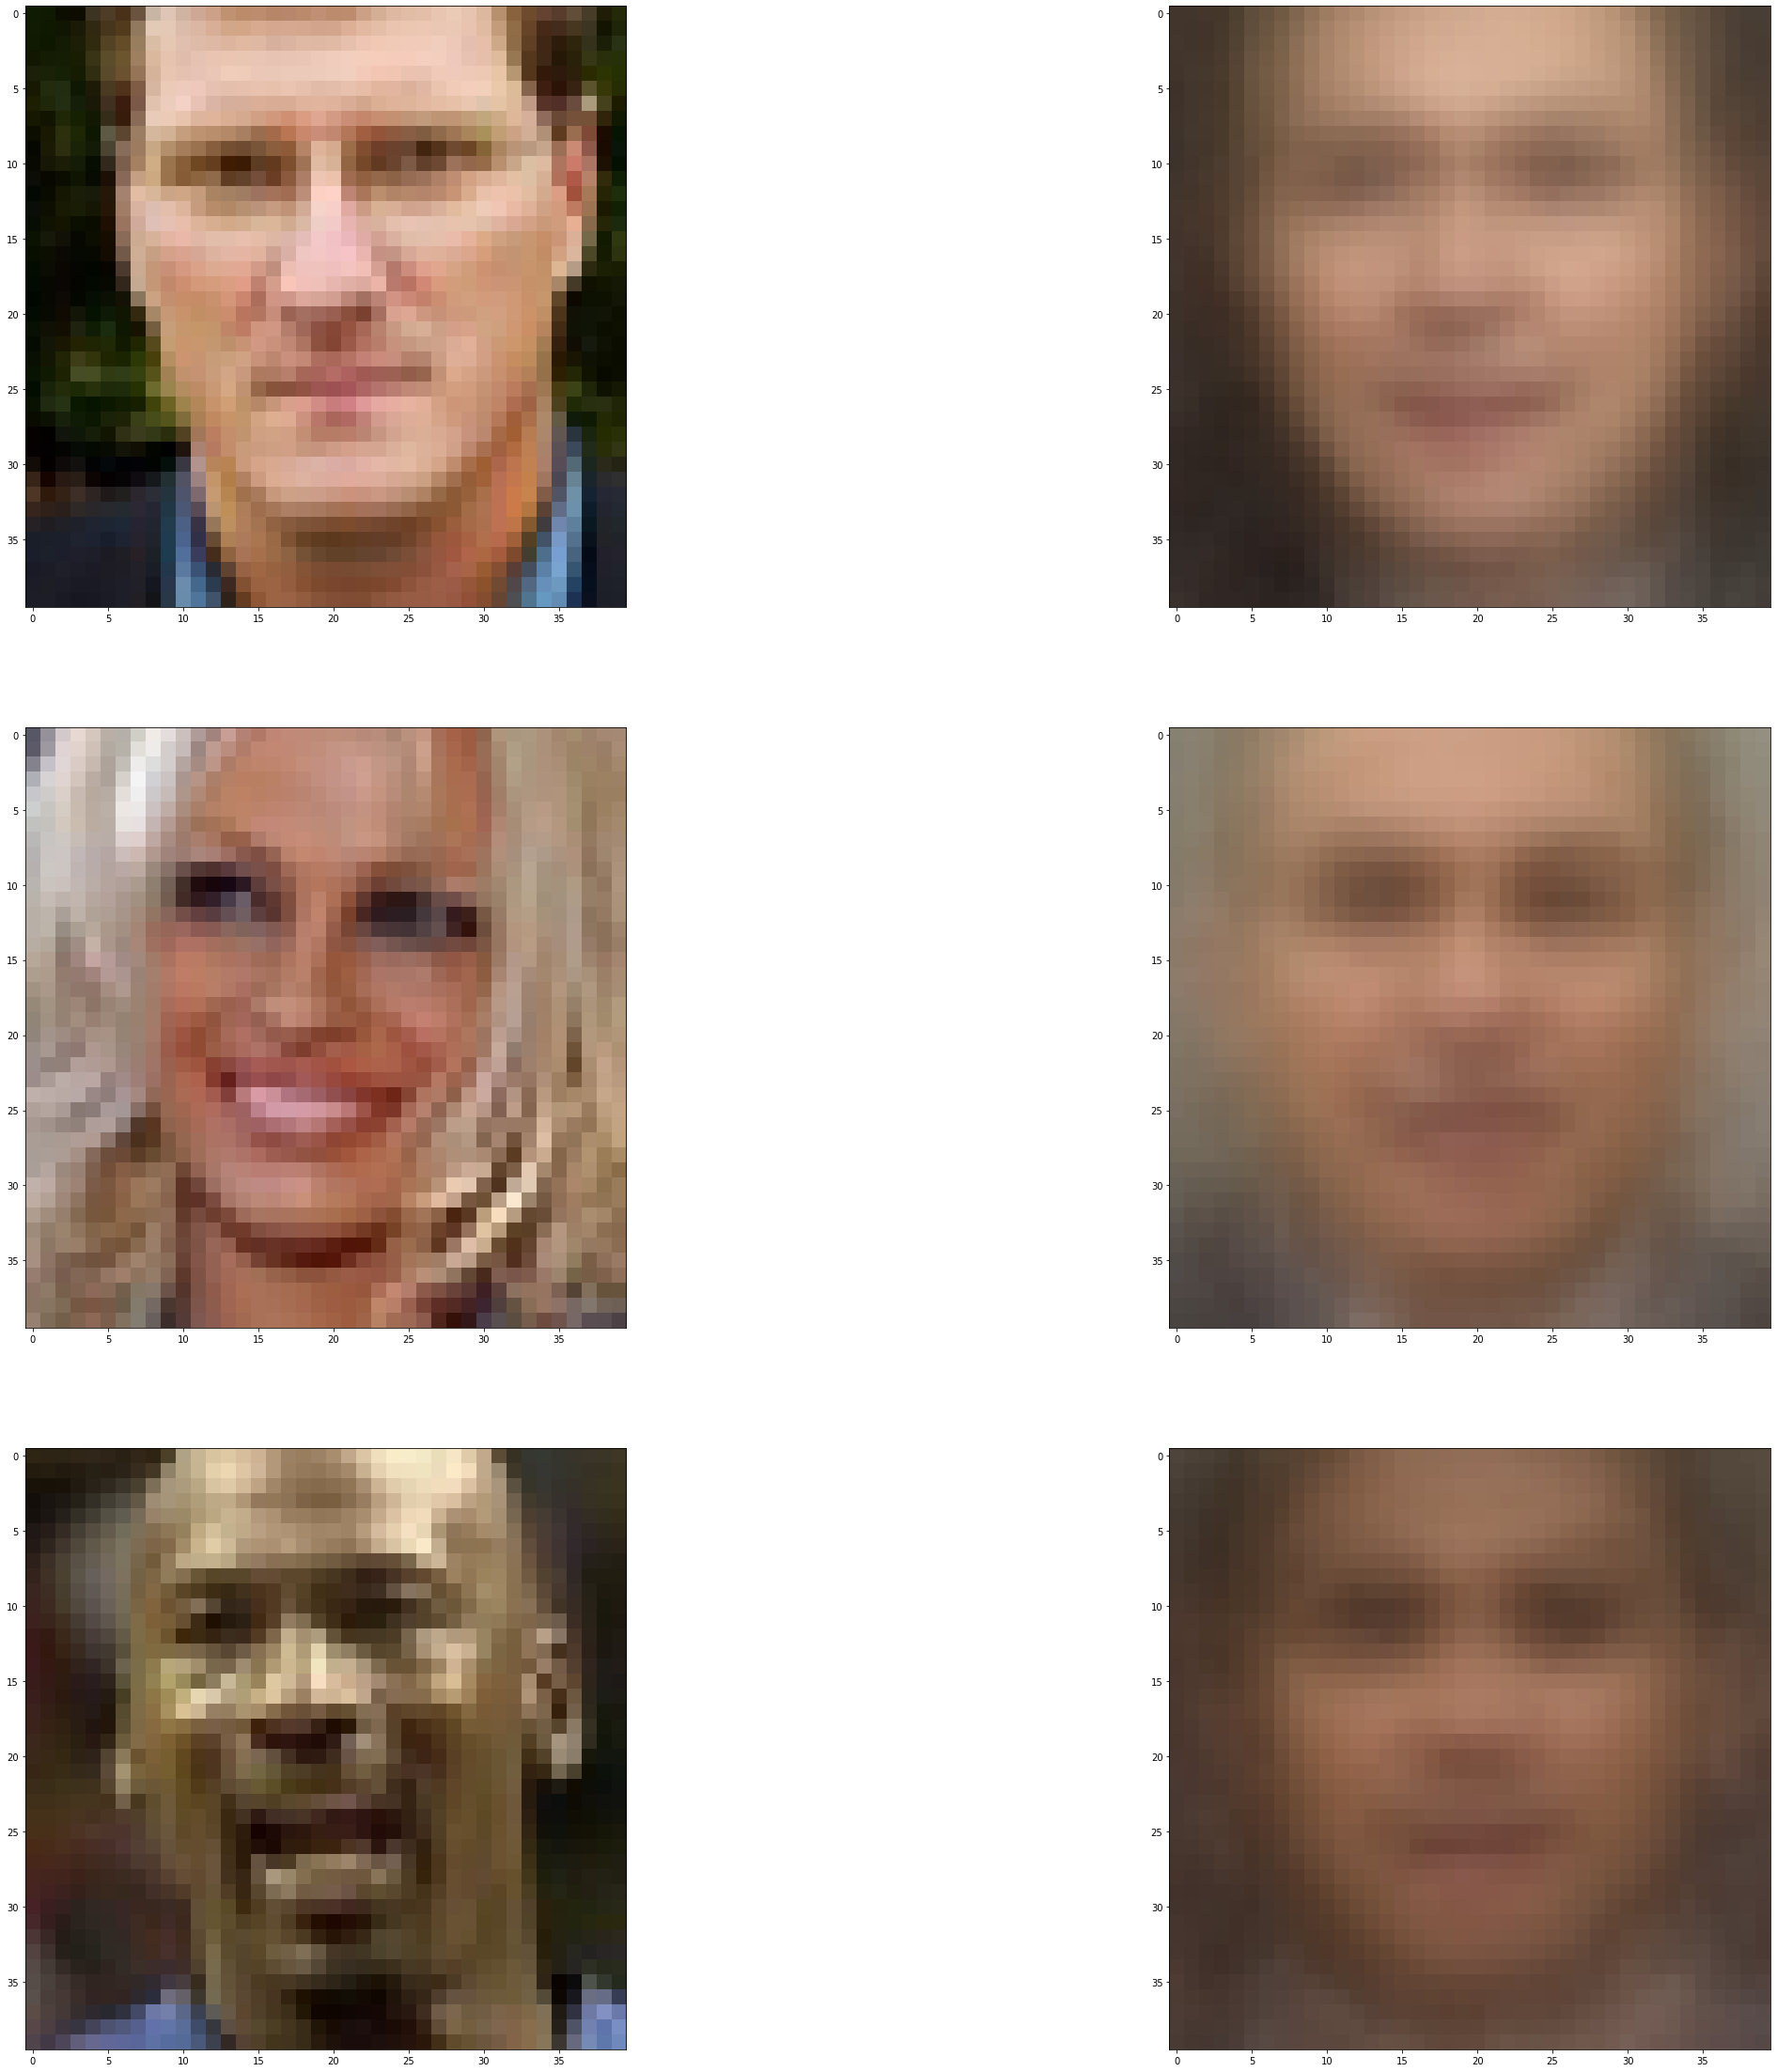

In [5]:
faces = scipy.io.loadmat("./data/wildfaces.mat")
Xf = faces.get("X")
yf = faces.get("Y")
kmeans10 = KMeans(n_clusters=10).fit(Xf)
clustersF= kmeans10.predict(Xf)

fig, a= plt.subplots(3, 2, figsize=(40,40))

a[0][0].imshow(np.reshape(Xf[0,:],(3,40,40)).T)
a[1][0].imshow(np.reshape(Xf[1,:],(3,40,40)).T)
a[2][0].imshow(np.reshape(Xf[2,:],(3,40,40)).T)

a[0][1].imshow(np.reshape(kmeans10.cluster_centers_[clustersF[0]],(3,40,40)).T)
a[1][1].imshow(np.reshape(kmeans10.cluster_centers_[clustersF[1]],(3,40,40)).T)
a[2][1].imshow(np.reshape(kmeans10.cluster_centers_[clustersF[2]],(3,40,40)).T)

> 4.1.3b (1 point) How well is the data represented by the cluster centroids? Are you able to recognize the faces in the compressed representation? What happens if you increase or decrease the number of clusters?

In [6]:
##Answer to question 4.1.3b
# YOUR CODE HERE

In some cases, the data is pretty well represented in the cluster centroids and you can recognize some faces. However for some others this is a lot harder and there is just visible that it is a face. When you increase the number of clusters, there are more possiblilties so it is easier to recognize the faces. If you lower the amount of clusters (to 1 for example), the cluster centroids are the same and are just a general face without being able to recognize the faces.

> 4.1.4a (1 point) Repeat the exercise with the digits data set. Load the digits data set from `data/digits`. Each data object is a $16 \times 16 = 256$ dimensional vector, corresponding to a gray scale $16 \times 16$ pixels image.
+ You can change the color map to black-on-white gray-scale by adding the parameter `cmap=cm.binary` to the function imshow().

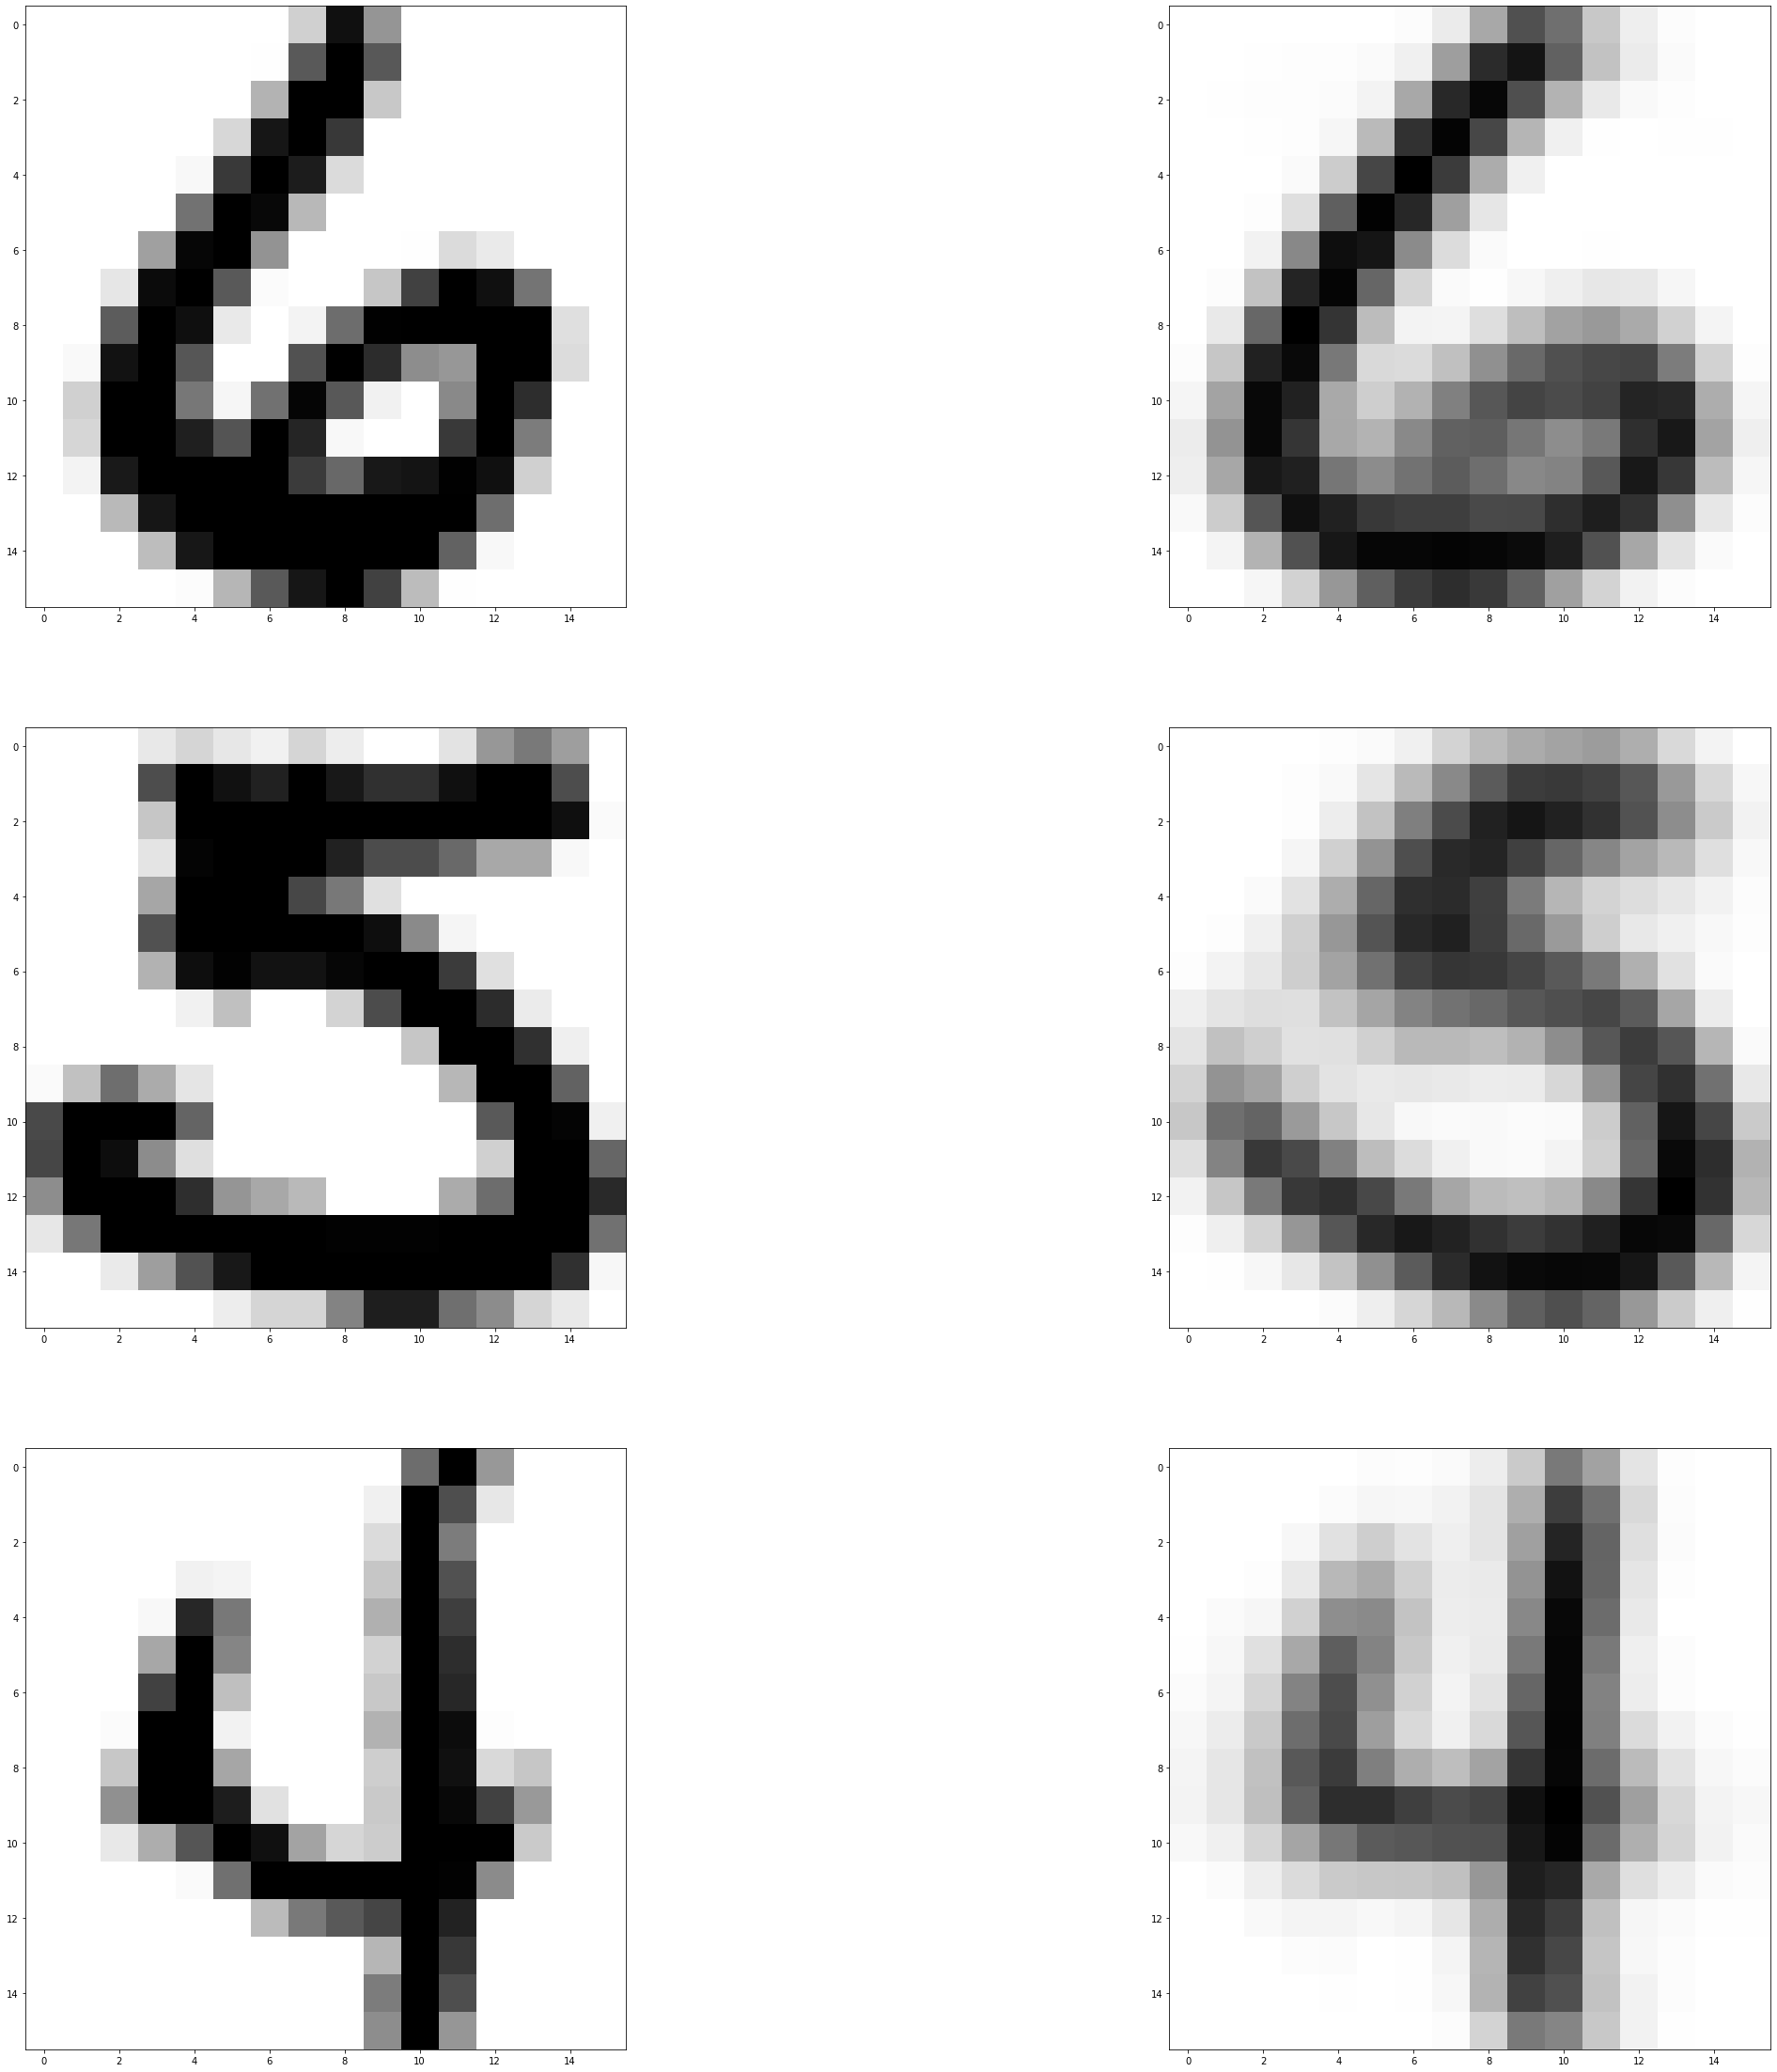

In [7]:
digits = scipy.io.loadmat("./data/digits.mat")
Xd = digits.get("X")
yd = digits.get("Y")
kmeans10d = KMeans(n_clusters=100).fit(Xd)
clustersD= kmeans10d.predict(Xd)

fig, a= plt.subplots(3, 2, figsize=(40,40))

a[0][0].imshow(np.reshape(Xd[0,:],(16,16)), cmap=plt.cm.binary)
a[1][0].imshow(np.reshape(Xd[1,:],(16,16)), cmap=plt.cm.binary)
a[2][0].imshow(np.reshape(Xd[2,:],(16,16)), cmap=plt.cm.binary)

a[0][1].imshow(np.reshape(kmeans10d.cluster_centers_[clustersD[0]],(16,16)), cmap=plt.cm.binary)
a[1][1].imshow(np.reshape(kmeans10d.cluster_centers_[clustersD[1]],(16,16)), cmap=plt.cm.binary)
a[2][1].imshow(np.reshape(kmeans10d.cluster_centers_[clustersD[2]],(16,16)), cmap=plt.cm.binary)

> 4.1.4b (1 point) Why does running *k*-means with *K = 10* not give you 10 clusters corresponding to the 10 digits *0..9*? How many clusters do you need to visually represent the 10 different digits? Are there any digits that the clustering algorithm seems to confuse more than others and can you explain why?

In [8]:
##Answer to question 4.1.4b
# YOUR CODE HERE

Some clusters are in multiple digits in the same place, so not every digit will have its on cluster. Almost always 100 clusters can represent the 10 different digits accuratly. The clustering algorithm seems to have trouble with the number 4. Furthermore, the algortihm seems to confuse 5 and 3 and 8 some times.

## 4.2 Hierarchical Clustering

In this part of the exercie we will consider hierarchical clustering based on the functions from the package `scipy.cluster.hierarchy`. The function `linkage()` forms a sample to sample distance matrix according to a given distance metric, and creates the linkages between data points forming the hierarchical cluster tree. The function *dendrogram* creates a plot of the generated tree. The function`fcluster` extracts the cluster from a linkage matrix w.r.t. a given criterion. Use *help* for the three functions (or read the online documentation) and inspect what distance metrics and linkage functions are implemented.

> 4.2.1a (1 point) Load the data set from `data/synth1`. Cluster the data using hierarchical clustering with single linkage using the Euclidean distance measure. Cluster the data into 4 clusters by cutting off the dendrogram at a threshold. Plot a dendrogram and a scatter plot of the clusters.
+ The function `linkage()` computes the hierarchical clustering, resulting in a matrix representing the hierarchy of clusterings. Type help(linkage) (or read the online documentation) to learn how to use it.
+ You can e.g. type `Z = linkage(X, method='single', metric='euclidean')` to use single linkage with the Euclidean distance measure.
+ To compute a clustering, you can use the function `fcluster()`. For example, type `cls = fcluster(Z, criterion='maxclust', t=4)` to get a maximum of 4 clusters. Type `help(fcluster)` (or read the online documentation) to learn more about what this function does.
+ To plot a dendrogram, you can use the `dendrogram()` function
+ Again, you can use the function `clusterplot()` to plot a scatter plot of the clustering.

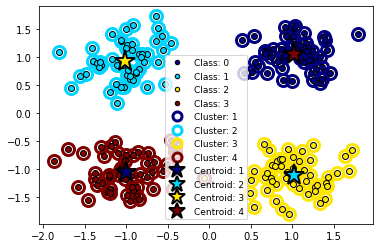

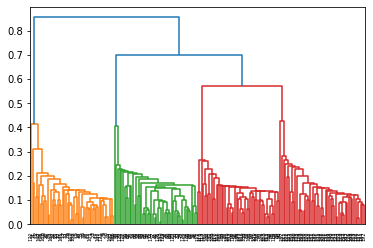

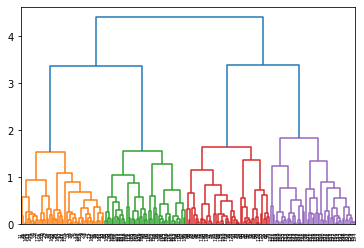

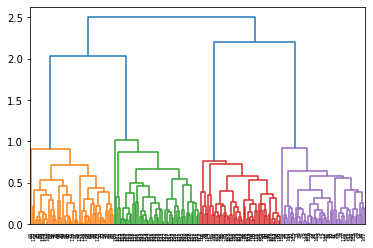

In [9]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram

Z1s = linkage(X1, method='single', metric='euclidean')
cls1s = fcluster(Z1s, criterion='maxclust', t=4)
clusterPlot(X1, cls1s, kmeans1.cluster_centers_, y=y1)
plt.show()
dendrogram(Z1s)
plt.show()

Z1c = linkage(X1, method='complete', metric='euclidean')
cls1c = fcluster(Z1c, criterion='maxclust', t=4)
dendrogram(Z1c)
plt.show()

Z1a = linkage(X1, method='average', metric='euclidean')
cls1a = fcluster(Z1a, criterion='maxclust', t=4)
dendrogram(Z1a)
plt.show()

> 4.2.1b (1 point) Change the linkage methods (single, complete, average) and explain how this changes the dendrogram.
Then plot a dendrogram and a scatterplot of the clusters for the *synth2*, *synth3*, and *synth4* data sets..

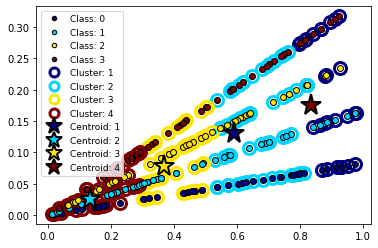

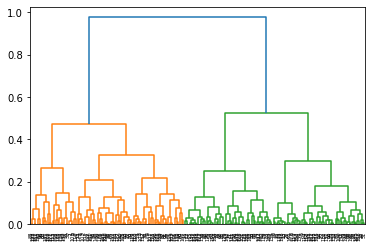

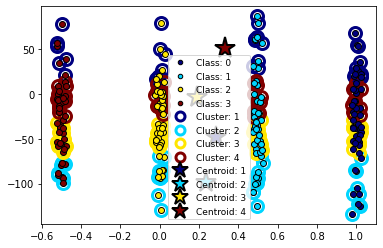

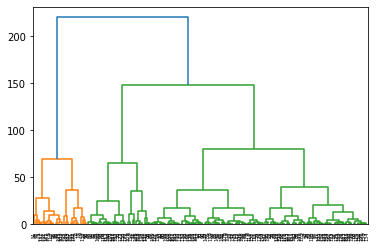

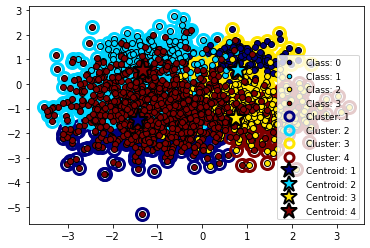

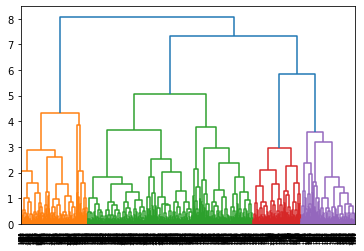

In [10]:
Z2c = linkage(X2, method='complete', metric='euclidean')
cls2c = fcluster(Z2c, criterion='maxclust', t=4)
clusterPlot(X2, cls2c, kmeans2.cluster_centers_, y=y2)
plt.show()
dendrogram(Z2c)
plt.show()

Z3c = linkage(X3, method='complete', metric='euclidean')
cls3c = fcluster(Z3c, criterion='maxclust', t=4)
clusterPlot(X3, cls3c, kmeans3.cluster_centers_, y=y3)
plt.show()
dendrogram(Z3c)
plt.show()

Z4c = linkage(X4, method='complete', metric='euclidean')
cls4c = fcluster(Z4c, criterion='maxclust', t=4)
clusterPlot(X4, cls4c, kmeans4.cluster_centers_, y=y4)
plt.show()
dendrogram(Z4c)
plt.show()

The dendrogram changes for every linkage method. For the single method, the dendrogram is very left sided. The average also has a more left influence, while the complete is more split in the middle. That is why we think the complete method is the best method.

## References
1. Tamara L Berg, Alexander C Berg, Jaety Edwards, and DA Forsyth. Who's in the
picture. *Advances in Neural Information Processing Systems*, 17:137-144, 2005.